In [1]:
# global definitions (Fig 13)

import pandas as pd

import seaborn as sn

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import numpy as np

from common_defs import *

from ches_dictionary import ches_dic

data_dir = '/home/foula/linate/plos_asonam_exp_data/italy_own/'

#results_dir = 'exp1_results/'
#graph_xlim = (2, 9)
#graph_ylim = (0, 9)
#gridsize = 200
#dim_ax = 'dim_ax_1'
#dim_ay = 'dim_ay_1'

#results_dir = 'exp2_results/'
#graph_xlim = (-1, 20)
#graph_ylim = (-1, 20)
#gridsize = 2000
#dim_ax = 'dim_ax_1'
#dim_ay = 'dim_ay_1'

#results_dir = 'exp3_results/'
#graph_xlim = (1, 10)
#graph_ylim = (0, 10)
#gridsize = 200
#dim_ax = 'dim_ax_1'
#dim_ay = 'dim_ay_1'

#results_dir = 'exp4_results/'
#graph_xlim = (-5, 15)
#graph_ylim = (0, 18)
#gridsize = 3000
#dim_ax = 'dim_ax_1'
#dim_ay = 'dim_ay_1'

#results_dir = 'exp5_results/'
#graph_xlim = (-1, 11)
#graph_ylim = (3, 10)
#gridsize = 200
#dim_ax = 'dim_ax_1'
#dim_ay = 'dim_ay_1'

#results_dir = 'exp6_results/'
#graph_xlim = (-3, 15)
#graph_ylim = (1, 12)
#gridsize = 2000
#dim_ax = 'dim_ax_1'
#dim_ay = 'dim_ay_1'

#results_dir = 'exp7_results/'
#graph_xlim = (-2, 12)
#graph_ylim = (0, 10)
#gridsize = 200
#dim_ax = 'dim_ax_1'
#dim_ay = 'dim_ay_1'

#results_dir = 'exp8_results/'
#graph_xlim = (-3, 10)
#graph_ylim = (-1, 15)
#gridsize = 1000
#dim_ax = 'dim_ax_1'
#dim_ay = 'dim_ay_1'

results_dir = 'exp9_results/'
graph_xlim = (-2, 12)
graph_ylim = (-1, 10)
gridsize = 200
dim_ax = 'dim_ax_1'
dim_ay = 'dim_ay_1'

# exp1, exp2, exp3,exp4,
#dimension_names_to_visualize = ['Left - economy - Right', 'People over elites (salience)']

# exp5, exp6
#dimension_names_to_visualize = ['Anti-islam rhetoric (salience)', 'Left - ideology - Right']

# exp7, exp8, exp9
dimension_names_to_visualize = ['Anti-islam rhetoric (salience)', 'Favors people over elites']

ches_dic_reverse = {}
for k in ches_dic.keys():
    ches_dic_reverse[ches_dic[k]] = k
                                                                  
dimensions_to_visualize = []
for dn in dimension_names_to_visualize:
    dimensions_to_visualize.append(ches_dic_reverse[dn].replace('ches_', 'ches2019_'))
print(dimensions_to_visualize)      

# Italy
followers_attitudinal_dimensions_file = data_dir + results_dir + 'source_attitudinal_dimensions.csv'
parliamentarians_attitudinal_dimensions_file = data_dir + results_dir + 'target_attitudinal_dimensions.csv'
party_attitudinal_dimensions_file = data_dir + results_dir + 'group_attitudinal_dimensions.csv'
parliamentarians_group_file = data_dir + 'ItalyOwn_reference_group.csv'
group_attitudes_file = data_dir + 'ItalyOwn_group_attitudes.csv'

group_graph_color_and_location_file = data_dir + 'party_graph_colors_and_location.csv'

country = 'Italy'
#graph_text_x = -1
#graph_text_y = 1.8
#legend_loc = 'lower left'

graph_file = data_dir + results_dir + 'italy_and_party.pdf'

['ches2019_anti_islam_rhetoric', 'ches2019_people_vs_elite']


In [2]:
# load attitudinal dimensions : followers

followers_df = pd.read_csv(followers_attitudinal_dimensions_file)
followers_df.head()

,entity,ches2019_anti_islam_rhetoric,ches2019_people_vs_elite,ches2019_galtan_dissent
0,0,6.863382,8.413822,-2.589291
1,1,5.600959,5.780244,0.254770
2,2,2.326163,3.758977,-0.208544
3,3,6.365606,6.160420,0.268612
4,4,5.386390,7.510771,-2.131209


In [3]:
# load latent dimensions : parliamentarians

parliamentarians_df = pd.read_csv(parliamentarians_attitudinal_dimensions_file)
parliamentarians_df.head()

# and parliamentarians group info
parliamentarians_group_df = pd.read_csv(parliamentarians_group_file)
parliamentarians_group_df.head()

# and merge it with latent_dimensions_info
print(parliamentarians_df.shape)
parliamentarians_df = pd.merge(parliamentarians_df, parliamentarians_group_df, left_on = 'entity', 
                               right_on = 'i', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

# also identify parliamentarians' party names, and keep the ones which have attirudinal information
group_names_df = pd.read_csv(group_attitudes_file)
ches_cols = []
for c in group_names_df.columns:
    if c.startswith('ches'):
        ches_cols.append(c)
group_names_df.dropna(subset = ches_cols, inplace = True)
group_names_df = group_names_df[['k', 'party']]
group_names_df.head()
#
parliamentarians_df = pd.merge(parliamentarians_df, group_names_df, on = 'k', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

# finally add color information for the graph
colors_and_location_df = pd.read_csv(group_graph_color_and_location_file)
parliamentarians_df = pd.merge(parliamentarians_df, colors_and_location_df, on = 'party', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

(785, 4)
(785, 6)
(686, 7)
(639, 14)


,entity,ches2019_anti_islam_rhetoric,ches2019_people_vs_elite,ches2019_galtan_dissent,i,k,party,color,dim_x,dim_y,dim_ax,dim_ay,dim_ax_1,dim_ay_1
0,2,2.838344,10.282180,6.365081,2,2,M5S,green,0.0,0.4,0.1,0.1,0.1,0.1
1,3,2.205670,9.777514,7.329495,3,2,M5S,green,0.0,0.4,0.1,0.1,0.1,0.1
2,5,2.633413,10.263476,6.616928,5,2,M5S,green,0.0,0.4,0.1,0.1,0.1,0.1
3,11,2.291931,9.514455,8.503891,11,2,M5S,green,0.0,0.4,0.1,0.1,0.1,0.1
4,13,2.449599,9.471352,7.859184,13,2,M5S,green,0.0,0.4,0.1,0.1,0.1,0.1


In [4]:
group_size_df = (parliamentarians_df.groupby(['party']).size()).to_frame().reset_index()

group_size_df.head(20)

,party,0
0,FI,125
1,Lega,152
2,M5S,242
3,PD,119
4,RI,1


In [5]:
group_names_df.head(20)

,k,party
0,0,FdI
2,2,M5S
3,3,Lega
5,5,FI
6,6,PD
13,13,RI


In [6]:
# also load/compute predicted dimensions of parties (as the mean point of parliamentarias in the party)

#group_dimensions_df = parliamentarians_df.groupby('party')[dimensions_to_visualize].mean()
#group_dimensions_df = group_dimensions_df.reset_index()
#print(group_dimensions_df.shape)
#group_dimensions_df = pd.merge(group_dimensions_df, colors_and_location_df, on = 'party', how = 'inner')
#print(group_dimensions_df.shape)
#group_dimensions_df.head(20)

group_dimensions_df = pd.read_csv(party_attitudinal_dimensions_file)
group_dimensions_df = group_dimensions_df[['entity'] + dimensions_to_visualize]
for c in group_dimensions_df.columns:
    if c != 'entity':
        group_dimensions_df.rename(columns = {c: c + '_pred'}, inplace = True)
        
#group_dimensions_df['entity'] = group_dimensions_df['entity'].astype(str)
print(group_dimensions_df.shape)
group_dimensions_df = pd.merge(group_dimensions_df, group_names_df, left_on = 'entity',
                               right_on = 'k', how = 'inner')
group_dimensions_df.drop(columns = ['entity', 'k'], inplace = True)
group_dimensions_df = pd.merge(group_dimensions_df, colors_and_location_df, on = 'party', how = 'inner')
print(group_dimensions_df.shape)
group_dimensions_df.head(20)

(16, 3)
(5, 10)


,ches2019_anti_islam_rhetoric_pred,ches2019_people_vs_elite_pred,party,color,dim_x,dim_y,dim_ax,dim_ay,dim_ax_1,dim_ay_1
0,1.092346,3.293596,RI,#CD6090,-0.1,0.4,0.1,0.1,0.1,0.1
1,2.442809,9.206826,M5S,green,0.0,0.4,0.1,0.1,0.1,0.1
2,9.122867,6.591433,Lega,#8968CD,0.2,0.0,0.1,0.1,0.1,0.1
3,5.683610,3.786771,FI,orange,-0.2,0.3,0.1,0.1,0.1,0.1
4,0.130947,0.943163,PD,yellow,0.1,-0.5,0.1,0.1,0.1,0.1


In [7]:
# finally load real dimensions of parties and merge them with predicted ones

real_party_dimensions_df = pd.read_csv(group_attitudes_file)
real_party_dimensions_df = real_party_dimensions_df[['party'] + dimensions_to_visualize]
for c in real_party_dimensions_df.columns:
    if c != 'party':
        real_party_dimensions_df.rename(columns = {c: c + '_real'}, inplace = True)
real_party_dimensions_df.head(10)

all_party_dimensions_df = pd.merge(real_party_dimensions_df, group_dimensions_df, on = 'party', how = 'inner')
all_party_dimensions_df.head(10)

,party,ches2019_anti_islam_rhetoric_real,ches2019_people_vs_elite_real,ches2019_anti_islam_rhetoric_pred,ches2019_people_vs_elite_pred,color,dim_x,dim_y,dim_ax,dim_ay,dim_ax_1,dim_ay_1
0,M5S,2.533333,9.529411,2.442809,9.206826,green,0.0,0.4,0.1,0.1,0.1,0.1
1,Lega,9.000000,6.937500,9.122867,6.591433,#8968CD,0.2,0.0,0.1,0.1,0.1,0.1
2,FI,4.800000,4.066667,5.683610,3.786771,orange,-0.2,0.3,0.1,0.1,0.1,0.1
3,PD,1.250000,2.062500,0.130947,0.943163,yellow,0.1,-0.5,0.1,0.1,0.1,0.1
4,RI,0.500000,3.357143,1.092346,3.293596,#CD6090,-0.1,0.4,0.1,0.1,0.1,0.1


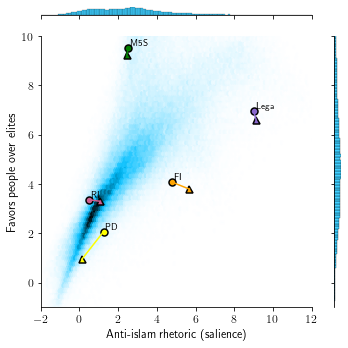

In [8]:
# visualization of two dimensions

xdim = dimensions_to_visualize[0]
ydim = dimensions_to_visualize[1]

color_dim = 'color'

ren = {xdim: 'x', ydim: 'y'}

disp = {}
for _, row in colors_and_location_df.iterrows():
    disp[row['party']] = (float(row[dim_ax]), float(row[dim_ay]))
    
df = followers_df.rename(columns = ren).drop_duplicates(subset = ['x', 'y'])

# followers
g = sn.jointplot(x = 'x', y = 'y', data = df, space = 0, color = "deepskyblue", 
                 kind = 'hex', ratio = 10, height = 5, xlim = graph_xlim, ylim = graph_ylim, #) ,
                 joint_kws = dict(gridsize = gridsize)) 

# party positions
for _, row in all_party_dimensions_df.iterrows():
    # predicted
    g.ax_joint.plot(row[xdim + '_pred'], row[ydim + '_pred'], '^', color = row[color_dim], mew = 1.5, ms = 7, mec = 'k')
    
    # real
    g.ax_joint.plot(row[xdim + '_real'], row[ydim + '_real'], 'o', color = row[color_dim], mew = 1.5, ms = 7, mec = 'k')
    
    # line between them
    g.ax_joint.plot([row[xdim + '_pred'], row[xdim + '_real']],
                    [row[ydim + '_pred'], row[ydim + '_real']], color = row[color_dim])
    
    # party name
    g.ax_joint.text(row[xdim + '_real'] + disp[row['party']][0],
                    row[ydim + '_real'] + disp[row['party']][1], row.party, 
                    color = 'black', fontsize = 9)

g.ax_joint.set_xlabel(dimension_names_to_visualize[0])
g.ax_joint.set_ylabel(dimension_names_to_visualize[1])

plt.tight_layout()

plt.savefig(graph_file)

plt.show()